review10

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns

%matplotlib inline

In [2]:
cd=pd.read_csv('CustomerData.csv')

In [3]:
cd.head(5)


,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435


In [4]:
cd.tail(5)

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
8,14,9,9,8,2435
9,15,36,7,2,1764
10,16,42,1,1,1547
11,17,46,1,1,1265
12,21,41,22,9,2465


In [5]:
from sklearn import preprocessing

In [6]:
#원본 데이터 복사 후 전처리 진행
cd_copy = cd.copy()

In [7]:
cd_copy_scaled=preprocessing.MinMaxScaler().fit_transform(cd_copy)

In [8]:
# 전처리된 데이터 복사 
cd_copy2 = cd_copy_scaled.copy()

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
X=kmeans.fit_predict(cd_copy2)


In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score

def visualize_silhouette(cluster_lists, X_features): 

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(5*n_cols, 5), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

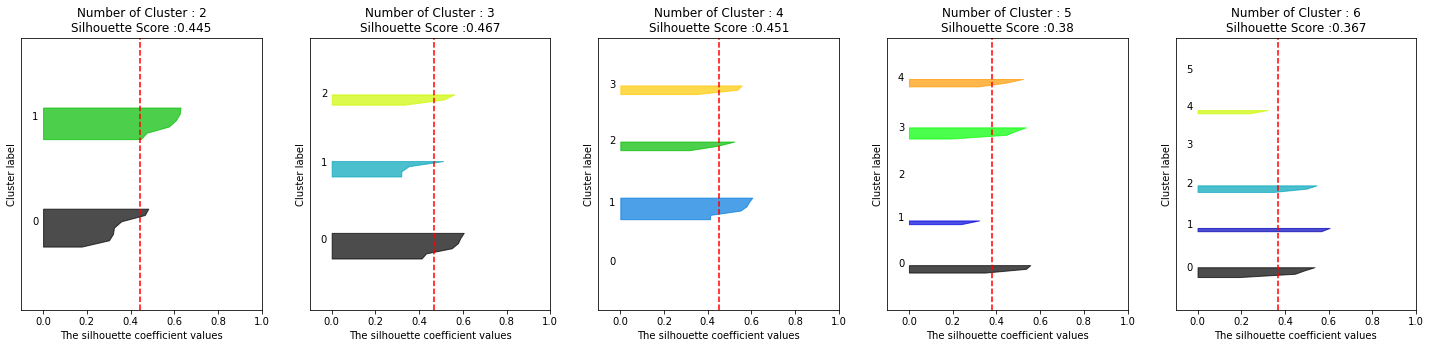

In [12]:
visualize_silhouette([2,3,4,5,6], cd_copy2)

In [13]:
cd_copy2

array([[0.        , 0.87804878, 0.45454545, 0.125     , 0.07771084],
       [0.05882353, 0.80487805, 0.81818182, 0.5       , 0.92048193],
       [0.11764706, 1.        , 0.        , 0.        , 0.06445783],
       [0.23529412, 0.09756098, 0.54545455, 0.375     , 0.72228916],
       [0.29411765, 0.02439024, 0.31818182, 0.25      , 0.72228916],
       [0.35294118, 0.6097561 , 0.77272727, 0.625     , 1.        ],
       [0.41176471, 0.75609756, 0.90909091, 0.875     , 0.98373494],
       [0.47058824, 0.75609756, 0.36363636, 0.125     , 0.        ],
       [0.58823529, 0.        , 0.40909091, 0.875     , 0.72228916],
       [0.64705882, 0.65853659, 0.31818182, 0.125     , 0.31807229],
       [0.70588235, 0.80487805, 0.04545455, 0.        , 0.1873494 ],
       [0.76470588, 0.90243902, 0.04545455, 0.        , 0.01746988],
       [1.        , 0.7804878 , 1.        , 1.        , 0.74036145]])

k=3

In [14]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(cd_copy)
kmeans.labels_
cd_copy['cluster']=kmeans.labels_


In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [16]:
#모든 데이터의 평균 실루엣 계수 값 구하시오
score_samples=silhouette_samples(cd_copy,cd_copy['cluster'])
print('silhoutte_samples() return 값의 shape', score_samples.shape)

cd_copy['silhouette_coeff']=score_samples

average_score=silhouette_score(cd_copy, cd_copy['cluster'])

#군집별 평균 실루엣 계수 값을 구하시오
cd_copy.groupby('cluster')['silhouette_coeff'].mean()



silhoutte_samples() return 값의 shape (13,)


cluster
0    0.932299
1    0.744155
2    0.766608
Name: silhouette_coeff, dtype: float64

In [17]:
from sklearn.cluster import MeanShift

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(cd_copy2)

In [18]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(cd_copy2)
print(round(bandwidth,3))


0.544


In [19]:
#최적의 bndwidth

meanshift=MeanShift(bandwidth=bandwidth)
cluster_labels=meanshift.fit_predict(cd_copy2)
print('cluster labels unique: ', np.unique(cluster_labels))

cluster labels unique:  [0 1 2 3 4]


### 2.

In [20]:
df = pd.read_csv('Mall_Customers.csv')

In [21]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
df.rename(columns = {"Annual Income (k$)" : "Annual Income", "Spending Score (1-100)":"Spending Score"}, inplace = True)


In [25]:
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


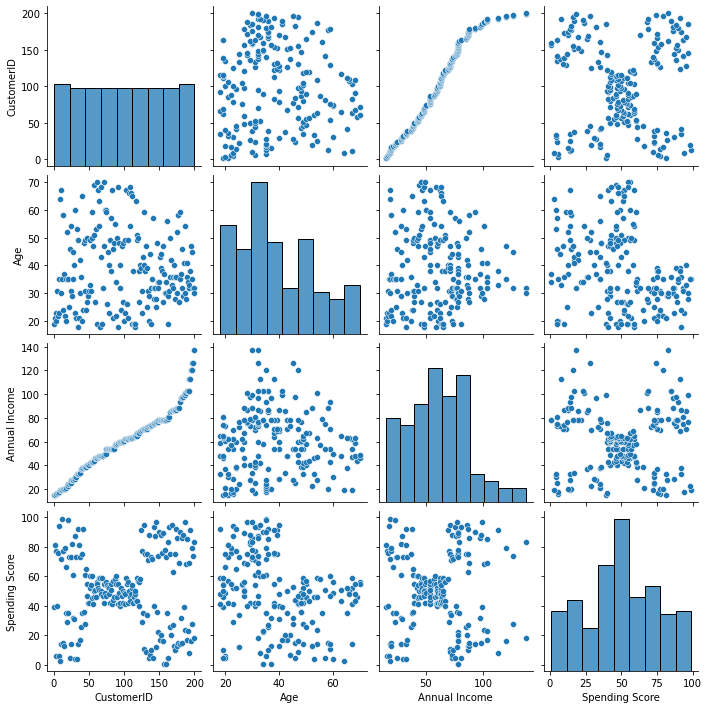

In [26]:
sns.pairplot(df)
#spending score 제외 정규분포아님

In [27]:
df.drop('CustomerID', axis=1, inplace=True)

In [28]:
df.head()

,Genre,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [29]:
x=df.iloc[: , 2:4]

In [30]:
x.shape

(200, 2)

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
dbscan=DBSCAN(eps=3, min_samples=4, metric='euclidean')
dbscan_labels=dbscan.fit_predict(x)

In [33]:
x['dbscan_cluster']=dbscan_labels

x['dbscan_cluster'].value_counts()

#노이즈가 많다
#eps, min_samples 값을 조절하면 9개의 cluster가 생기지 않는다

-1    121
 2     28
 1     15
 0     10
 4      6
 3      4
 5      4
 6      4
 7      4
 8      4
Name: dbscan_cluster, dtype: int64

In [34]:
y_means = dbscan.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s= 50, c= 'pink')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s= 50, c= 'yellow')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s= 50, c= 'cyan')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s= 50, c= 'magenta')
plt.scatter(x[y_means == 4,0], x[y_means == 4,1], s= 50, c= 'orange')
plt.scatter(x[y_means == 5,0], x[y_means == 5,1], s= 50, c= 'blue')
plt.scatter(x[y_means == 6,0], x[y_means == 6,1], s= 50, c= 'red')
plt.scatter(x[y_means == 7,0], x[y_means == 7,1], s= 50, c= 'black')
plt.scatter(x[y_means == 8,0], x[y_means == 8,1], s= 50, c= 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending score from 1-100')
plt.title('Clusters of data')
plt.show()

TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]), 0)' is an invalid key

<Figure size 504x360 with 0 Axes>

### 3

In [35]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [36]:
from sklearn.datasets import make_circles

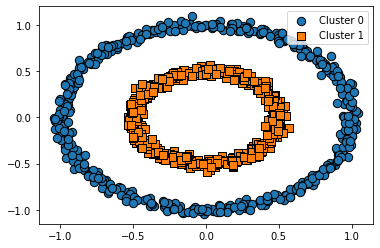

In [37]:
X,y=make_circles(n_samples=1000, noise=0.03,  factor=0.5)
clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

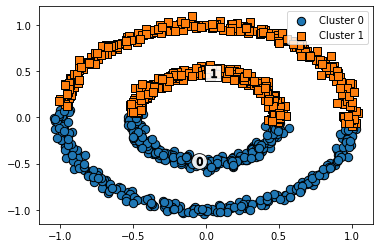

In [38]:
#KMeans
kmeans=KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

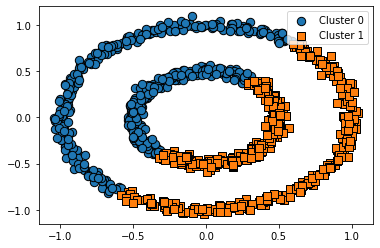

In [39]:
#GMM
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2, random_state=0)
gmm_label=gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)


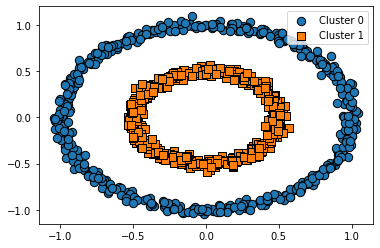

In [40]:
#DBSCAN
dbscan=DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels=dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

### 4.

In [41]:
clusterDF=pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])

In [42]:
from sklearn.mixture import BayesianGaussianMixture

bgm=BayesianGaussianMixture(n_components=20, random_state=33)
bgm_labels=bgm.fit(x)

In [43]:
np.round(bgm.weights_, 2)
#불필요한 클러스터 가중치 0으로 처리됨

array([0.01, 0.  , 0.04, 0.  , 0.3 , 0.  , 0.13, 0.  , 0.07, 0.13, 0.16,
       0.  , 0.  , 0.13, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [44]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd', '8', 'D']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [45]:
clusterDF['bgm_label']=bgm_labels
visualize_cluster_plot(bgm, clusterDF, 'bgm_label', iscenter=False)

#베이즈가우시안 혼합모델은 해당 함수 수행불가했음

TypeError: '<' not supported between instances of 'BayesianGaussianMixture' and 'BayesianGaussianMixture'

### 5.

In [46]:
#돌려주시면 됩니다!

#데이터셋 불러오기
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#계층적 샘플링으로 데이터 나누기
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [47]:
from sklearn.decomposition import PCA


In [48]:
def _get_number_components(model, threshold):
    component_variance = model.explained_variance_ratio_
    explained_variance = 0.0
    components = 0

    for var in component_variance:
        explained_variance += var
        components += 1
        if(explained_variance >= threshold):
            break
    return components

### Get the optimal number of components
pca = PCA()
train_pca = pca.fit_transform(X_train)
components = _get_number_components(pca, threshold=0.99)
components

199

In [49]:
pca = PCA(n_components=199)
train_pca = pca.fit_transform(X_train)

In [50]:
from sklearn.mixture import GaussianMixture

gmm_per_k=[GaussianMixture(n_components=k, n_init=10, random_state=33).fit(X_train) for k in range(1,16)]

bics=[train_pca.bic(X_train) for train_pca in gmm_per_k]
aics=[train_pca.aic(X_train) for train_pca in gmm_per_k]

plt.plot(range(1,16), acis, 'rs--')
plt.plot(range(1,16), bics, 'bo--')
plt.legend(['AIC', 'BIC'])
plt.show()

#본인개인컴퓨터의 메모리부족으로 running 실패

C:\Users\pby02\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pby02\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pby02\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
#최적 n_component 값을 넣어 gmm을 fit 시키고 알고리즘이 수렴했는지 확인해보세요